In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:\\projects\\DEEP LEARNING\\GAIL Historical Data2.csv",parse_dates=True,index_col='Date',dayfirst=False)
df

,Price,Open,High,Low,Vol.,Change %,date
Date,,,,,,,
2014-11-16,89.20,90.99,94.12,87.97,30.16M,-2.85%,2014-11-16
2014-11-23,91.54,89.49,93.63,87.94,36.75M,2.62%,2014-11-23
2014-11-30,88.00,91.22,91.87,86.44,30.47M,-3.87%,2014-11-30
2014-12-07,79.56,87.93,88.68,77.85,45.64M,-9.59%,2014-12-07
2014-12-14,81.58,78.28,82.61,75.98,56.38M,2.54%,2014-12-14
...,...,...,...,...,...,...,...
2024-10-13,221.43,229.40,234.50,217.35,69.72M,-3.47%,2024-10-13
2024-10-20,206.08,223.00,223.55,202.44,46.07M,-6.93%,2024-10-20
2024-10-27,200.16,205.00,209.28,198.05,49.37M,-2.87%,2024-10-27


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2014-11-16 to 2024-11-10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     522 non-null    float64
 1   Open      522 non-null    float64
 2   High      522 non-null    float64
 3   Low       522 non-null    float64
 4   Vol.      522 non-null    object 
 5   Change %  522 non-null    object 
 6   date      522 non-null    object 
dtypes: float64(4), object(3)
memory usage: 32.6+ KB


<Axes: xlabel='Date'>

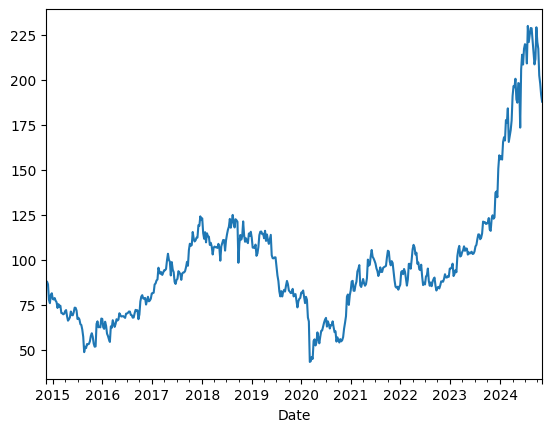

In [4]:
df['Low'].plot()

In [5]:
len(df)

522

In [6]:
gail_low=df['Low']

In [7]:
gail_low.reset_index(drop=True)
gail_low.shape

(522,)

In [8]:
gail_low=pd.DataFrame(gail_low)

In [9]:
train=gail_low.iloc[:500]
test=gail_low.iloc[500:]

In [10]:
len(test)

22

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

##Creating a model

In [16]:
test.shape

(22, 1)

In [17]:
length =22
batch_size=32

generator=TimeseriesGenerator(scaled_train,scaled_train,length=length, batch_size=batch_size)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM, Dropout

In [19]:
n_features=1

In [20]:
model=Sequential()
model.add(SimpleRNN(35,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 35)                  │           1,295 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,331 (5.20 KB)

 Trainable params: 1,331 (5.20 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(generator,epochs=12,shuffle=False)

Epoch 1/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039
Epoch 2/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037
Epoch 3/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0038
Epoch 4/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032
Epoch 5/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0036
Epoch 6/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031
Epoch 7/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031
Epoch 8/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029
Epoch 9/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032
Epoch 10/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0033
Epoch 11/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031
Epoch 12/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030


In [23]:
losses=pd.DataFrame(model.history.history)

<Axes: >

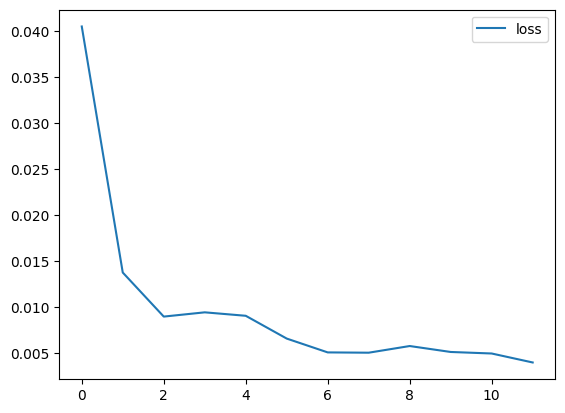

In [24]:
losses.plot()

In [25]:
first_eval_batch=scaled_train[-length:]

In [26]:
first_eval_batch=first_eval_batch.reshape((1,length,1))

In [27]:
first_eval_batch

array([[[0.70386319],
        [0.69156004],
        [0.75153789],
        [0.76783957],
        [0.75676673],
        [0.82658711],
        [0.8179749 ],
        [0.86657234],
        [0.75184547],
        [0.77122293],
        [0.79183071],
        [0.82535679],
        [0.90871063],
        [0.94285187],
        [0.93885335],
        [0.96776575],
        [0.89733022],
        [0.8859498 ],
        [0.95300197],
        [0.95084892],
        [0.80075049],
        [1.        ]]])

In [28]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


array([[0.8088601]], dtype=float32)

In [29]:
scaled_test[0]

array([1.04988927])

In [30]:
test_pred=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_pred.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [31]:
test_pred

[array([0.8088601], dtype=float32),
 array([0.8602048], dtype=float32),
 array([0.8270824], dtype=float32),
 array([0.84371436], dtype=float32),
 array([0.7302817], dtype=float32),
 array([0.8615528], dtype=float32),
 array([0.7409679], dtype=float32),
 array([0.7987856], dtype=float32),
 array([0.74993646], dtype=float32),
 array([0.75592023], dtype=float32),
 array([0.7227388], dtype=float32),
 array([0.7149989], dtype=float32),
 array([0.71840477], dtype=float32),
 array([0.69648725], dtype=float32),
 array([0.72350425], dtype=float32),
 array([0.67169863], dtype=float32),
 array([0.7147881], dtype=float32),
 array([0.64578396], dtype=float32),
 array([0.69896257], dtype=float32),
 array([0.65242636], dtype=float32),
 array([0.67991483], dtype=float32),
 array([0.64551306], dtype=float32)]

In [32]:
true_pred=scaler.inverse_transform(test_pred)

In [33]:
true_pred

array([[174.81830162],
       [183.16489487],
       [177.78051422],
       [180.48420578],
       [162.04459488],
       [183.38401909],
       [163.7817466 ],
       [173.18059151],
       [165.23967117],
       [166.21239281],
       [160.81841972],
       [159.56022133],
       [160.11387939],
       [156.55096703],
       [160.94285011],
       [152.52132927],
       [159.52595016],
       [148.30864067],
       [156.95335526],
       [149.38842941],
       [153.85695511],
       [148.26460266]])

In [70]:
test['predictions']=true_pred
test

C:\Users\abhis\AppData\Local\Temp\ipykernel_13080\2369521764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_pred


,Low,predictions,LSTM_predictions
Date,,,
2024-06-16,214.00,174.818302,186.878515
2024-06-23,208.55,183.164895,187.987188
2024-06-30,217.28,177.780514,188.581105
2024-07-07,219.86,180.484206,188.951073
2024-07-14,219.02,162.044595,189.210892
2024-07-21,209.15,183.384019,189.312427
2024-07-28,230.00,163.781747,189.388488
2024-08-04,221.00,173.180592,189.384787
2024-08-11,225.07,165.239671,189.506436


<Axes: xlabel='Date'>

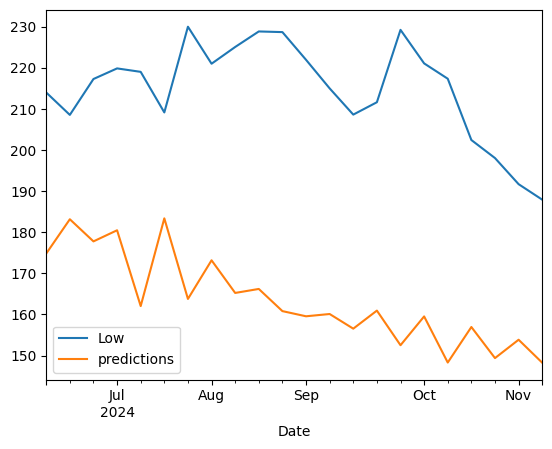

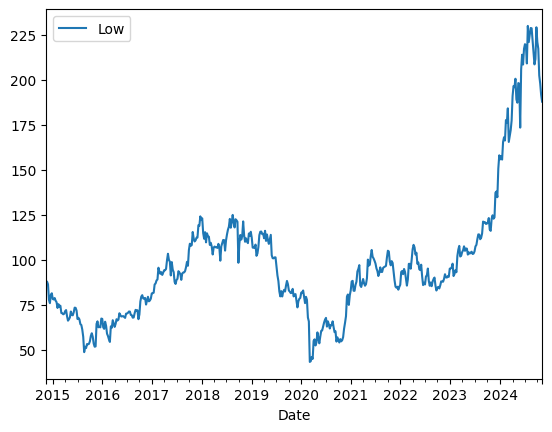

In [35]:
test.plot()
gail_low.plot()

In [36]:
full_scaler=MinMaxScaler()
scale_full_data=full_scaler.fit_transform(gail_low)

In [37]:
generator=TimeseriesGenerator(scale_full_data,scale_full_data,length=length, batch_size=batch_size)

In [71]:
model=Sequential()
model.add(SimpleRNN(25,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.fit(generator,epochs=12,shuffle=False)

Epoch 1/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0679
Epoch 2/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0255
Epoch 3/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193
Epoch 4/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169
Epoch 5/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0143
Epoch 6/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124
Epoch 7/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112
Epoch 8/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118
Epoch 9/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0097
Epoch 10/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095
Epoch 11/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0086
Epoch 12/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0094


In [40]:
full_losses=pd.DataFrame(model.history.history)

<Axes: >

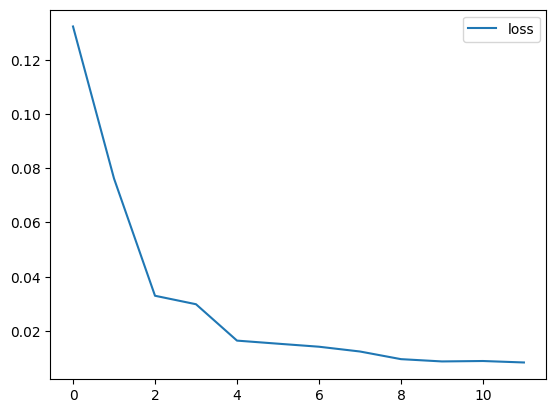

In [41]:
full_losses.plot()

In [42]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(20):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [43]:
forecast=scaler.inverse_transform(forecast)

In [44]:
forecast

array([[169.83158081],
       [193.81435143],
       [163.2440081 ],
       [191.50776741],
       [157.72228119],
       [195.64995644],
       [141.79252678],
       [203.37676193],
       [124.80702286],
       [205.16562561],
       [104.04970943],
       [212.63584793],
       [ 75.22459146],
       [218.14058945],
       [ 41.65805687],
       [217.0331958 ],
       [ 10.68268074],
       [210.22000702],
       [-13.57857094],
       [203.27533401]])

In [45]:
forecast.flatten()

array([169.83158081, 193.81435143, 163.2440081 , 191.50776741,
       157.72228119, 195.64995644, 141.79252678, 203.37676193,
       124.80702286, 205.16562561, 104.04970943, 212.63584793,
        75.22459146, 218.14058945,  41.65805687, 217.0331958 ,
        10.68268074, 210.22000702, -13.57857094, 203.27533401])

In [73]:
df_array=np.array(gail_low)

In [74]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

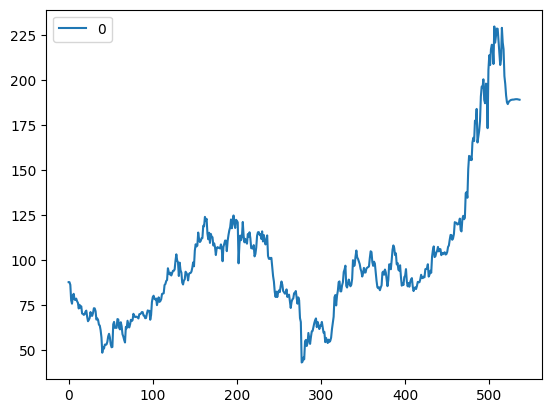

In [75]:
full_data.plot()

##LSTM MODEL

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [50]:
length

22

In [51]:
scaled_test.shape

(22, 1)

In [52]:
length=21
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length, batch_size=batch_size)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=batch_size)


In [76]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.fit(generator,epochs=12,validation_data=validation_generator,
         callbacks=[early_stop],shuffle=False)

Epoch 1/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0635 - val_loss: 0.2802
Epoch 2/12
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0092 - val_loss: 0.0095


<Axes: >

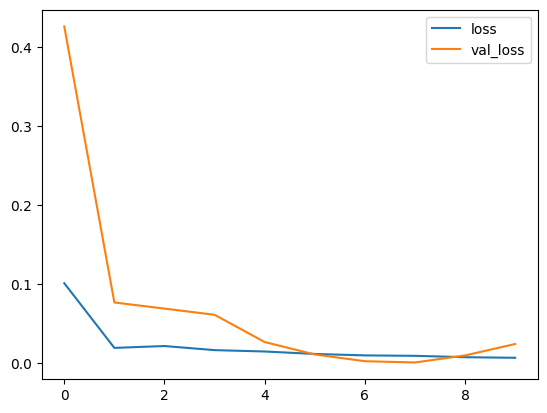

In [55]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [56]:
test_pred=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_pred.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


C:\Users\abhis\AppData\Local\Temp\ipykernel_13080\514468163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions']= true_predictions


<Axes: xlabel='Date'>

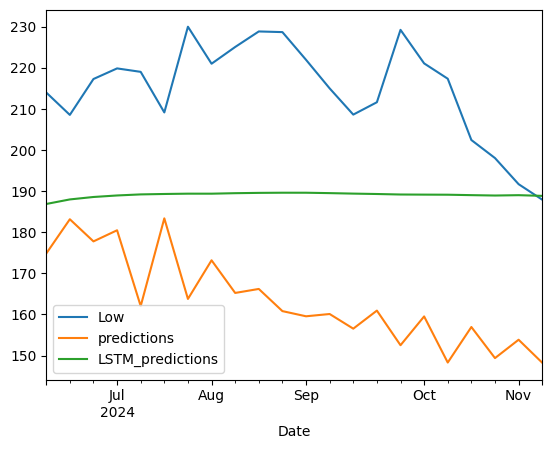

In [78]:
true_predictions=scaler.inverse_transform(test_pred)
test['LSTM_predictions']= true_predictions
test.plot()

In [58]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(15):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [59]:
forecast=scaler.inverse_transform(forecast)

In [60]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

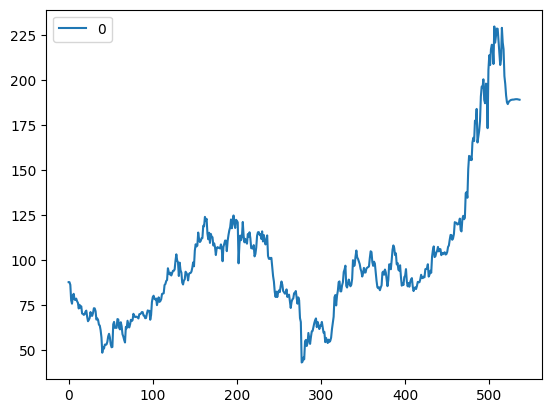

In [61]:
full_data.plot()

In [62]:
forecast

array([[186.87851509],
       [187.98718773],
       [188.58110497],
       [188.95107269],
       [189.21089211],
       [189.31242661],
       [189.38848785],
       [189.38478653],
       [189.50643608],
       [189.58063698],
       [189.61931679],
       [189.61582863],
       [189.52036934],
       [189.40260521],
       [189.30555687]])

In [63]:
full_data.tail(30)

,0
507,221.000000
508,225.070000
509,228.850000
510,228.690000
511,221.950000
512,215.000000
513,208.620000
514,211.630000
515,229.240000
516,221.080000


##FB Prophet model

In [64]:
df.reset_index(inplace=True)

In [65]:
data=df[['Date','Low']]
data.head(10)

,Date,Low
0,2014-11-16,87.97
1,2014-11-23,87.94
2,2014-11-30,86.44
3,2014-12-07,77.85
4,2014-12-14,75.98
5,2014-12-21,80.63
6,2014-12-28,81.47
7,2015-01-04,78.28
8,2015-01-11,78.03
9,2015-01-18,78.82


In [66]:
data=data.rename(columns={"Date":"ds","Low":"y"})
data.head()

,ds,y
0,2014-11-16,87.97
1,2014-11-23,87.94
2,2014-11-30,86.44
3,2014-12-07,77.85
4,2014-12-14,75.98


In [79]:
from prophet import Prophet
m= Prophet(changepoint_prior_scale=0.5,daily_seasonality=True)
m.fit(data)

13:04:02 - cmdstanpy - INFO - Chain [1] start processing
13:04:03 - cmdstanpy - INFO - Chain [1] done processing


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

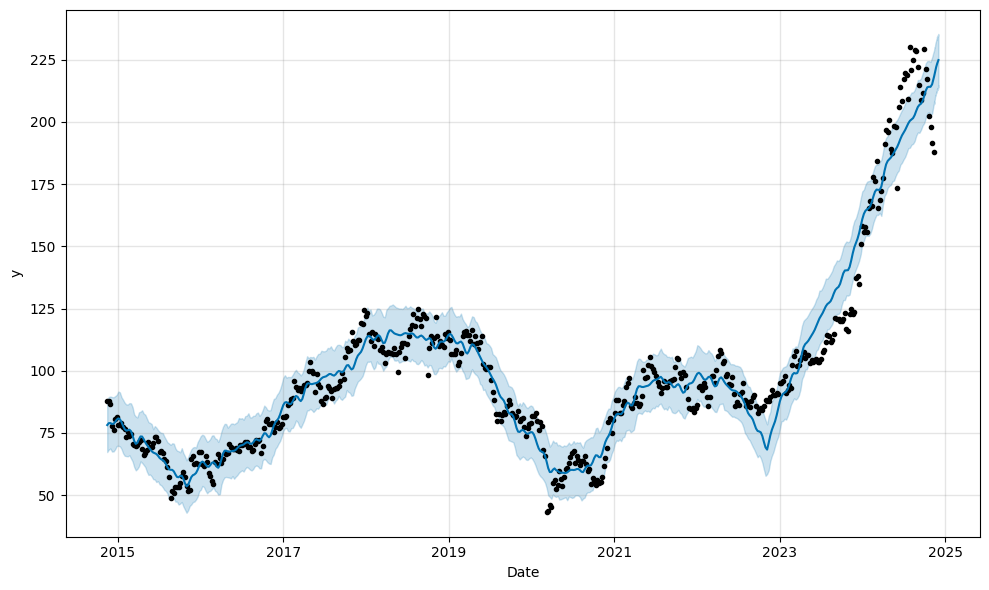

In [80]:
future=m.make_future_dataframe(periods=21)
prediction=m.predict(future)
m.plot(prediction)
plt.xlabel("Date")
plt.ylable("Close price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()